<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/DatatDay10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:

from sklearn.datasets import load_iris

iris = load_iris()

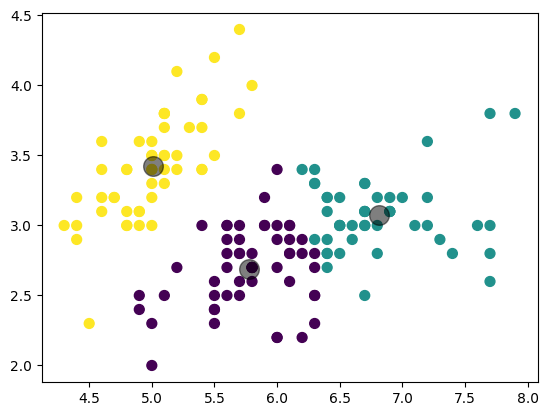

In [42]:

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, :2]

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

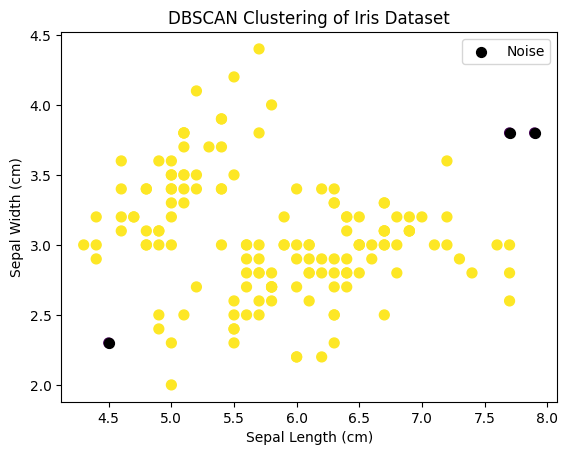

In [44]:

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, :2]

dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(X)
y_dbscan = dbscan.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN Clustering of Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

noise_points = X[y_dbscan == -1]
if len(noise_points) > 0:
    plt.scatter(noise_points[:, 0], noise_points[:, 1], c='black', s=50, label='Noise')
    plt.legend()

plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.7139
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4822 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3681 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5374 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5114 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3557 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3956 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3169 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4158  
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1308 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0726 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9794 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9033  
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8605 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6959  
Epoch 16/100
4/4 ━━━━━━━━━━━

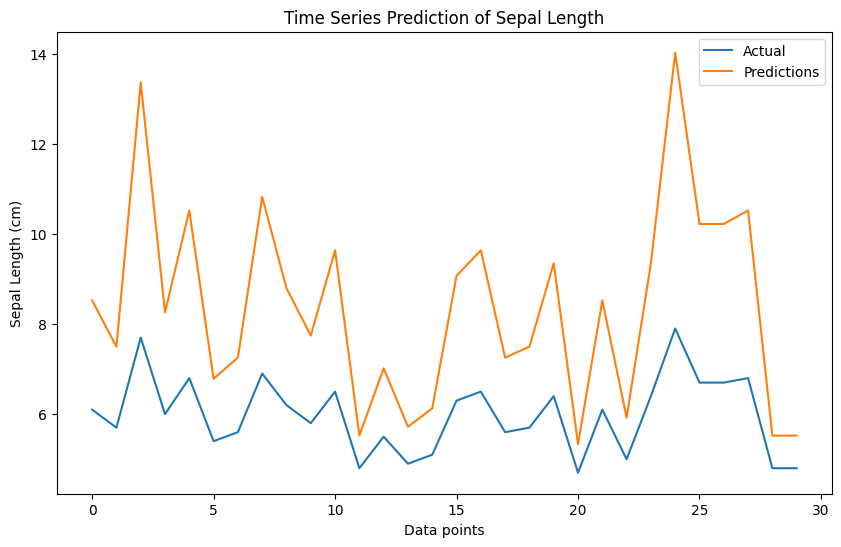

In [45]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

feature = 'sepal length (cm)'
target = 'target'

X = data[[feature]]
y = data[target]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 1)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(X_test.reshape(-1,1))


plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('Time Series Prediction of Sepal Length')
plt.xlabel('Data points')
plt.ylabel('Sepal Length (cm)')
plt.show()

In [46]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 10}
Best Accuracy: 0.9666666666666667
